# Lab 5: Take home exercise
## st121411
___

> #### The polar conversion portion of the take home exercise is in the **in lab exercise 5 (lab5_ilab_st121411.ipynb)** jupyter notebook sent together with this notebook as it uses the same dataset as the *in lab exercise 5*. 

___

This notebook shows the application of newton's method onto the dataset from *take home exercise 3*. 

In [1]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
#data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)

print('Training data:\n', data_train)

Training data shape (614, 13)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               

## Cleaning the data

In [2]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [3]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

married = data_train['Married'].value_counts()

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)

In [4]:
dependent = data_train['Dependents'].value_counts()
def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train,):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)

fill_dependent_status(9, 2, 2, 2)

data_train['Dependents'].replace('3+', 4, inplace = True)

In [5]:
LoanAmt = data_train['LoanAmount'].value_counts()
loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True)

In [6]:
Gender = data_train['Gender'].value_counts()

def fill_gender_status(data, yes_num_train, no_num_train):        
    data['Gender'].fillna('Male', inplace = True, limit = yes_num_train)
    data['Gender'].fillna('Female', inplace = True, limit = no_num_train)  

fill_gender_status(data_train,11, 3)

Gender = data_train['Gender'].value_counts()

In [7]:
selfe = data_train['Self_Employed'].value_counts()

def fill_selfe_status(data, yes_num_train, no_num_train):        
    data['Self_Employed'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Self_Employed'].fillna('No', inplace = True, limit = no_num_train)  

fill_selfe_status(data_train, 6, 30)

In [8]:
LoanAmt = data_train['Loan_Amount_Term'].value_counts()

loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

data_train['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True)

In [9]:
selfe = data_train['Credit_History'].value_counts()

def fill_credith_status(data, yes_num_train, no_num_train):        
    data['Credit_History'].fillna(1.0, inplace = True, limit = yes_num_train)
    data['Credit_History'].fillna(0.0, inplace = True, limit = no_num_train)  

fill_credith_status(data_train, 45, 9)

## Creating X and y

In [10]:
#create design matrix X and y

X = data_train.iloc[:,1:-1].copy()

X.loc[X['Gender'] == 'Male', 'Gender'] = 0
X.loc[X['Gender'] == 'Female', 'Gender'] = 1
X.loc[X['Married'] == 'No', 'Married'] = 0
X.loc[X['Married'] == 'Yes', 'Married'] = 1
X.loc[X['Education'] == 'Graduate', 'Education'] = 1
X.loc[X['Education'] == 'Not Graduate', 'Education'] = 0
X.loc[X['Self_Employed'] == 'Yes', 'Self_Employed'] = 1
X.loc[X['Self_Employed'] == 'No', 'Self_Employed'] = 0
X.loc[X['Property_Area'] == 'Urban', 'Property_Area'] = 1
X.loc[X['Property_Area'] == 'Semiurban', 'Property_Area'] = 2
X.loc[X['Property_Area'] == 'Rural', 'Property_Area'] = 0

X_train = X.values.astype(float)

mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

X_train = (X_train-mean)/std

y = data_train['Loan_Status'].copy()

y[y == 'Y'] = 1
y[y == 'N']= 0

y_train = y.values.astype(float).reshape(-1,1)

ix = np.arange(X_train.shape[0])
np.random.shuffle(ix)
percentage = 0.7
ix_train = ix[:int(percentage*ix.size)]
ix_test = ix[int(percentage*ix.size):]
X_test = X_train[ix_test]
X_train = X_train[ix_train]
y_test = y_train[ix_test]
y_train = y_train[ix_train]

In [11]:
m,n = X_train.shape

theta_initial = np.zeros(n+1)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test,0,1,axis=1)
print(X_train.shape,X_test.shape)

(429, 12) (185, 12)


## Newton's Method class

In [12]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def h(self,X, theta):
        return self.sigmoid(X @ theta)

    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = - X.T @ (y - y_pred) / m
        return grad
        
    def hessian(self, X, y, theta):
        m = len(y)
        y_pred = self.h(X,theta).reshape(-1,1)
        hess_mat = X.T@X*(y_pred.T@(1-y_pred))/m
        return hess_mat
        
    def costFunc(self, theta, X, y):    
        m = len(y)
        y_pred = self.h(X,theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - np.linalg.inv(self.hessian(X,y,theta))@grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        for i in range(0,X.shape[0]):
            y1=self.h(X[i].reshape(1,-1),theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_pred=self.predict(X,theta)
        correct=np.sum(y_pred == y)
        total = y.size
        return (float(correct)/float(total))*100

In [13]:
NM_model = Logistic_NM()

iterations = 10000

nm_theta, nm_cost = NM_model.newtonsMethod(X_train, y_train.reshape(-1), theta_initial, iterations)
print("theta:",nm_theta)

Minimum at iteration: 9998
theta: [ 0.84501801  0.13141877  0.24336304 -0.00362081  0.0308602  -0.02251761
  0.0271095  -0.07558125  0.03929003 -0.00386329  1.35922758  0.32079032]


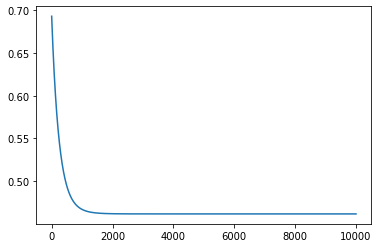

In [14]:
iter_series = np.linspace(1,iterations,iterations)
plt.plot(iter_series,nm_cost)

In [15]:
print("Accuracy =",NM_model.getAccuracy(X_test,y_test.reshape(-1),nm_theta))

Accuracy = 79.45945945945945


In [16]:
# define class for logistic regression: batch gradient descent
class Logistic_BGD:
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        z -= np.max(z)
        return np.exp(z) / np.sum(np.exp(z))
    
    def h(self,X, theta):
        return self.sigmoid(X @ theta)
    
    def h2(self, X, theta):
        return self.softmax(np.dot(X,theta))
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = - X.T @ (y - y_pred) / m
        return grad
        
    def costFunc(self, theta, X, y):    
        m = len(y)
        y_pred = self.h(X,theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - alpha * grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        for i in range(0,X.shape[0]):
            y1=self.h(X[i].reshape(1,-1),theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_pred=self.predict(X,theta)
        correct=np.sum(y_pred == y)
        total = y.size
        return (float(correct)/float(total))*100

In [17]:
alpha = 1
iterations = 50

BGD_model = Logistic_BGD()

bgd_theta, bgd_cost =  BGD_model.gradientAscent(X_train,y_train.reshape(-1),theta_initial,alpha,iterations)
print(bgd_theta)

Minimum at iteration: 49
[ 0.84711162  0.12688081  0.24068714 -0.00420599  0.03226402 -0.02195647
  0.0266584  -0.07653244  0.03832746 -0.0037745   1.34968592  0.31937233]


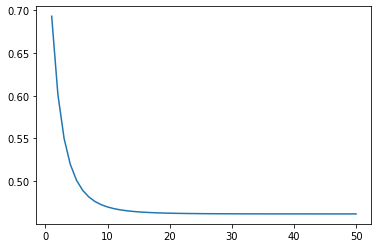

In [18]:
iter_series = np.linspace(1,iterations,iterations)
plt.plot(iter_series,bgd_cost)

In [19]:
print("Accuracy =",BGD_model.getAccuracy(X_test,y_test.reshape(-1),bgd_theta))

Accuracy = 79.45945945945945


We were able to find the optimal theta in approximately 10000 iterations by using Newton's Method. Surprisingly, when batch gradient descent was used, I was able to reduce the iterations down to only 50 iterations. Although Newton's Method is very easy to tune because it only has one variable(number of iterations) batch gradient descent gives us more flexibility for choosing different values of alpha as well.

Although not entirely sure of the reason, I can guess that Newton's Method works very well in non complex datasets, but when there are multiple independent variables(12), Newton's Method does not perform as well compared to batch gradient descent.